In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_3/models')
filename = "modelrf_fold3_15AB_5FP_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold3_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.090200,0.267980,0.219679,-0.158959,0.162105,-0.042084,0.084312,-0.218358,-0.010455,-0.204073,...,0.055734,-0.145530,0.041018,0.082720,0.054183,0.173297,Abnormal,P1,FP-A,AB01
1,0.044678,0.841102,0.002407,-0.032882,0.064645,-0.143355,0.227642,0.089027,-0.131678,-0.197295,...,-0.132748,-0.143332,0.405049,0.100642,0.208828,0.249496,Abnormal,P2,FP-A,AB01
2,-0.057841,0.412785,0.588262,-0.114341,-0.126307,0.012343,0.748545,-0.158135,-0.133665,-0.189791,...,0.356242,-0.156004,0.080186,-0.002415,0.979429,-0.070431,Abnormal,P41,FP-B,AB01
3,-0.143934,0.441689,0.181358,0.049190,-0.062895,-0.204115,0.304447,-0.125413,-0.226165,-0.010858,...,0.427014,0.001355,-0.079135,-0.049643,0.482689,-0.032489,Abnormal,P51,FP-C,AB01
4,-0.152798,0.195670,0.645023,-0.001228,-0.109656,-0.188251,0.240093,-0.185809,-0.158295,-0.215531,...,0.027094,0.161550,-0.093486,-0.091747,0.489922,-0.125006,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.972460,0.136353,-0.021817,-0.175827,0.455629,-0.112664,-0.105685,0.032526,0.369374,0.392514,...,0.070912,-0.161321,0.383919,0.534650,0.126356,0.349933,Normal,P32,FP-B,Normal
1308,-0.145123,-0.163424,-0.193196,0.027842,-0.145429,0.363753,-0.196891,0.305309,0.602125,0.293565,...,-0.100162,0.124206,-0.134638,0.203516,-0.212966,0.044164,Normal,P42,FP-B,Normal
1309,1.008150,0.559302,0.082543,0.519868,0.645499,-0.033070,0.049776,-0.094038,0.009965,0.424981,...,0.395090,-0.093633,0.324743,1.214715,0.166041,0.308219,Normal,P52,FP-C,Normal
1310,0.303565,-0.142265,0.013412,-0.063746,0.148837,-0.094101,0.137822,0.032107,-0.079520,0.089263,...,-0.007241,-0.184380,-0.153420,0.308569,-0.210416,0.491909,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2050]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.090200,0.267980,0.219679,-0.158959,0.162105,-0.042084,0.084312,-0.218358,-0.010455,-0.204073,...,-0.106687,-0.203136,0.221762,0.113528,0.055734,-0.145530,0.041018,0.082720,0.054183,0.173297
1,0.044678,0.841102,0.002407,-0.032882,0.064645,-0.143355,0.227642,0.089027,-0.131678,-0.197295,...,-0.131726,-0.140295,0.040377,0.165284,-0.132748,-0.143332,0.405049,0.100642,0.208828,0.249496
2,-0.057841,0.412785,0.588262,-0.114341,-0.126307,0.012343,0.748545,-0.158135,-0.133665,-0.189791,...,-0.122520,-0.146854,0.344905,-0.083592,0.356242,-0.156004,0.080186,-0.002415,0.979429,-0.070431
3,-0.143934,0.441689,0.181358,0.049190,-0.062895,-0.204115,0.304447,-0.125413,-0.226165,-0.010858,...,-0.059891,-0.187969,0.218237,0.128112,0.427014,0.001355,-0.079135,-0.049643,0.482689,-0.032489
4,-0.152798,0.195670,0.645023,-0.001228,-0.109656,-0.188251,0.240093,-0.185809,-0.158295,-0.215531,...,-0.145808,-0.196737,0.194850,-0.031299,0.027094,0.161550,-0.093486,-0.091747,0.489922,-0.125006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.972460,0.136353,-0.021817,-0.175827,0.455629,-0.112664,-0.105685,0.032526,0.369374,0.392514,...,1.075741,-0.105923,-0.189425,0.720874,0.070912,-0.161321,0.383919,0.534650,0.126356,0.349933
1308,-0.145123,-0.163424,-0.193196,0.027842,-0.145429,0.363753,-0.196891,0.305309,0.602125,0.293565,...,0.241254,-0.060432,0.434454,0.056729,-0.100162,0.124206,-0.134638,0.203516,-0.212966,0.044164
1309,1.008150,0.559302,0.082543,0.519868,0.645499,-0.033070,0.049776,-0.094038,0.009965,0.424981,...,0.482182,-0.174730,-0.105573,0.382151,0.395090,-0.093633,0.324743,1.214715,0.166041,0.308219
1310,0.303565,-0.142265,0.013412,-0.063746,0.148837,-0.094101,0.137822,0.032107,-0.079520,0.089263,...,0.657269,-0.068910,-0.181269,0.102622,-0.007241,-0.184380,-0.153420,0.308569,-0.210416,0.491909


In [6]:
y_test

0       FP-A
1       FP-A
2       FP-B
3       FP-C
4       FP-B
        ... 
1307    FP-B
1308    FP-B
1309    FP-C
1310    FP-C
1311    FP-E
Name: Views, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[144  81  37   8   1]
 [ 22 340  36   1   2]
 [  2  49 301  22   0]
 [  5   5  33 153   0]
 [  0  12   5   4  49]]
              precision    recall  f1-score   support

        FP-A       0.83      0.53      0.65       271
        FP-B       0.70      0.85      0.77       401
        FP-C       0.73      0.80      0.77       374
        FP-D       0.81      0.78      0.80       196
        FP-E       0.94      0.70      0.80        70

    accuracy                           0.75      1312
   macro avg       0.80      0.73      0.76      1312
weighted avg       0.77      0.75      0.75      1312



Text(0.5, 21.5, 'Predicted label')

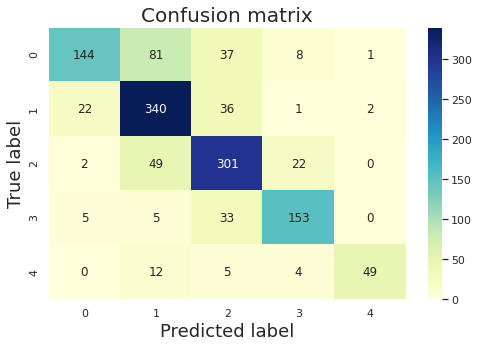

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)